# Питон и машинное обучение

# Модуль 3. Метрики качества и настройка параметров моделей

- Метрики качества в задачах машинного обучения с учителем:
    - MSE и MAE (mean square error, mean absolute error)
    - confusion matrix (матрица точности и полноты)
    - accuracy, precision, recall, f-мера
    - ROC/AUC
- Bias/Variance trade-off
- Выбор гиперпараметров модели


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('always', category=UserWarning)

## Метрики

### Количественные метрики

Метрики качества, основанные на вычислении разности между предсказанным результатом и истиной:

MAE - mean absolute error: 

$MAE = \frac{1}{n} * \sum_{i=1}^{n}|x_i-y_i|$

MSE - mean squared error:

$MSE = \frac{1}{n} * \sum_{i=1}^{n}(x_i-y_i)^2$

RMSE - root mean squared error:

$RMSE = \sqrt{\frac{1}{n} * \sum_{i=1}^{D}(x_i-y_i)^2}$

Эти метрики можно использовать для сравнения качества работы моделей, а также использовать их как функции потерь.

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3, 
                                                   random_state=20231110,
                                                   stratify = y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

cls1 = RandomForestClassifier(n_estimators=3, max_depth=5, n_jobs=-1) 
cls1.fit(X_train,y_train)

pred_cls1 = cls1.predict(X_test)
pred_cls1

In [ ]:
cls2 = RandomForestClassifier(n_estimators=40, max_depth=20, n_jobs=-1) 
cls2.fit(X_train,y_train)

pred_cls2 = cls2.predict(X_test)
pred_cls2

In [ ]:
y_test

In [ ]:
from sklearn.metrics import mean_squared_error

print(f"MSE value Classifier 1: {mean_squared_error(y_test, pred_cls1)}")
print(f"MSE value Classifier 2: {mean_squared_error(y_test, pred_cls2)}")
print()

### R2-метрика или коэффициент детерминации

Ее можно считать нормированной среднеквадратичной ошибкой.

$R^2 = 1 - \frac{\sum_{i=1}^{n}(x_i-y_i)^2}{{\sum_{i=1}^{n}(y_i-\overline{y})^2}}$

здесь $\overline{y} = \frac{1}{n} * \sum_{i=1}^{n}y_i$ - среднее значение целевой переменной из контрольной выборки.

Если R2 метрика близка к 1, значит можель хорошо объясняет данные. R2 может принимать и отрицательные значение, и это значит что модель обучена плохо.

In [ ]:
from sklearn.metrics import r2_score

print(f"R2 value Classifier 1: {r2_score(y_test, pred_cls1)}")
print(f"R2 value Classifier 2: {r2_score(y_test, pred_cls2)}")
print()

## Матрица ошибок

Она же __confusion matrix__ или __матрица точности и полноты__.

Для задачи бинарной классификации матрицу можно представить следующим образом:
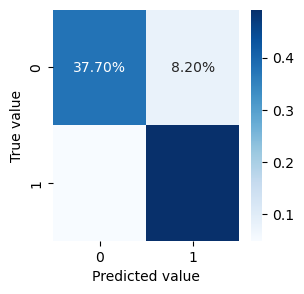

Для задачи классификации по n классам ее можно сформировать и визуализировать следющим образом:

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, pred_cls1)

cf_matrix

In [ ]:
plt.figure(figsize=(10,9))

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_ylabel('True value')
ax.set_xlabel('Predicted value')

plt.show()

#### ⁉️ Задание

Для датасета "glass.csv" обучите классификатор "Случайный лес" с рандомными параметрами и постройте confutsion matrix.

Атрибуты датасета:
```
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
              are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
  -- 1 building_windows_float_processed
  -- 2 building_windows_non_float_processed
  -- 3 vehicle_windows_float_processed
  -- 4 vehicle_windows_non_float_processed (none in this database)
  -- 5 containers
  -- 6 tableware
  -- 7 headlamps
```



In [ ]:
columns = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type of glass", ]
# ваш код здесь



## Accuracy, Precision, Recall, F1

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

$Precision = \frac{TP}{TP+FP}$

$Recall = \frac{TP}{TP+FN}$

$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$

На примере датасета "отток абонентов".

## ROC/AUC

## Bias-variance trade-off

